## Importing Necessary Modules

In [1]:
import cv2
import google.generativeai as genai
import PIL.Image
import textwrap
import glob
import os

from IPython.display import Markdown, display, Image

import matplotlib.pyplot as plt

c:\Users\user\miniconda3\envs\internship\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Utility Functions

In [2]:
def to_markdown(text):
    text = text.replace('•', '  *')
    return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [3]:
def list_files(directory):
    files = []
    for root, _, filenames in os.walk(directory):
        for filename in filenames:
            file_path = os.path.join(root, filename)
            files.append(file_path)
    return files

In [4]:
def create_directory(directory_path):
    if not os.path.exists(directory_path):
        try:
            os.makedirs(directory_path)
            print(f"Directory '{directory_path}' created successfully.")
        except OSError as e:
            print(f"Error creating directory '{directory_path}': {e}")
    else:
        print(f"Directory '{directory_path}' already exists.")

## Converting the Video to Frames

In [5]:
video = "baseball_training (720p).mp4"
cam = cv2.VideoCapture(video)
fps = cam.get(cv2.CAP_PROP_FPS)
fps

23.976023976023978

In [6]:
video

'baseball_training (720p).mp4'

In [7]:
n = 0  # counting the frames
i = 0  # counting the frames to be saved
ret = True
directory_path = f'D:\\_FoE\\_Internship\\Video_Description\\frames\\{video}'
create_directory(directory_path)


while True:
    ret, frame = cam.read()
    if not ret:
        break
    n += 1
    if n % (4*int(fps)) == 0:
        cv2.imwrite(f"{directory_path}/frame{i}.jpg", frame)
        i += 1

cam.release()
cv2.destroyAllWindows()

Directory 'D:\_FoE\_Internship\Video_Description\frames\baseball_training (720p).mp4' already exists.


## Generating the description

In [8]:
API_KEY = ''
genai.configure(api_key=API_KEY)

In [9]:
model = genai.GenerativeModel('gemini-pro-vision')

In [10]:
try:
    os.remove(f'{directory_path}/{video}.txt')
except OSError:
    print("No text file to remove")

In [11]:
file_paths = list_files(directory_path)


for file_path in file_paths:
    img = PIL.Image.open(file_path)
    # plt.imshow(img)
    # plt.axis('off')
    # plt.show()
    response = model.generate_content(["Write a decription with as much detail as possible about the human beings in the given image if there is any, otherwise output no."
                                   ,img],  ## Without background ## upto 10 people in the image  ## list ## use security footage ## night videos  
                                   generation_config=genai.types.GenerationConfig(
                                       temperature=0.5
                                   ))
    response.resolve()
    #response.text
    with open(f'{directory_path}/{video}.txt', 'a') as file:
        file.write(f'{file_path[-10:-4]} :')
        file.write(response.text)
        file.write('\n')
        file.write('\n')

(-0.5, 1279.5, 719.5, -0.5)

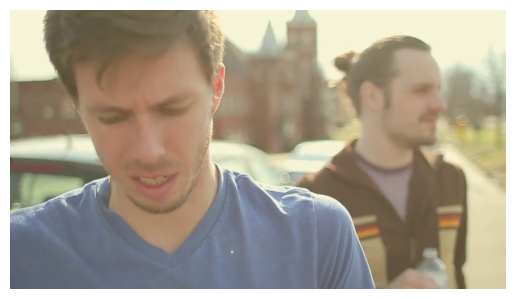

In [81]:
img = Image.open('frame0.jpg')
plt.imshow(img)
plt.axis('off')

In [70]:
response = model.generate_content(["Write a decription with as much detail as possible about the human beings in the given image if there is any, otherwise output no."
                                   ,img],
                                   generation_config=genai.types.GenerationConfig(
                                       temperature=0.5
                                   ))
response.resolve()


In [78]:
response.text


' There are two men in the image. They both have short brown hair. The man on the left is wearing a blue shirt and the man on the right is wearing a brown jacket over a purple shirt. The man in the blue shirt has a beard and the man in the brown jacket has a mustache. They are both looking at something off camera.'

In [80]:
with open('example.txt', 'a') as file:
    file.write(response.text)
    file.write('\n')